In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
# Leva slika
x1 = np.array([814, 110, 1])
x2 = np.array([953, 159, 1])
x3 = np.array([988, 123, 1])
x4 = np.array([854, 78, 1])
x5 = np.array([791, 303, 1])
x6 = np.array([913, 358, 1])
x7 = np.array([950, 318, 1])
# x8 - nevidljiva
x9 = np.array([322, 345, 1])
x10 = np.array([454, 368, 1])
x11 = np.array([509, 272, 1])
x12 = np.array([386, 248, 1])
x13 = np.array([364, 558, 1])
x14 = np.array([478, 582, 1])
x15 = np.array([526, 486, 1])
# x16 - nevidljiva
x17 = np.array([137, 551, 1])
x18 = np.array([434, 761, 1])
x19 = np.array([816, 382, 1])
x20 = np.array([549, 251, 1])
x21 = np.array([174, 655, 1])
x22 = np.array([449, 860, 1])
x23 = np.array([806, 487, 1])
# x24 - nevidljiva

In [3]:
# Desna slika
y1 = np.array([912, 445, 1])
y2 = np.array([812, 559, 1])
y3 = np.array([918, 611, 1])
y4 = np.array([1014, 491, 1])
# y5 - nevidljiva
y6 = np.array([772, 769, 1])
y7 = np.array([864, 823, 1])
y8 = np.array([956, 702, 1])
y9 = np.array([296, 74, 1])
y10 = np.array([252,  119,  1])
y11 = np.array([371,  137,  1])
y12 = np.array([414,  88,  1])
# y13 - nevidljiva
y14 = np.array([287,  324,  1]) 
y15 = np.array([397,  342,  1])
y16 = np.array([433,  288,  1])
# y17 - nevidljiva
y18 = np.array([135,  319,  1])
y19 = np.array([527,  529,  1])
y20 = np.array([744,  348,  1])
# y21 - nevidljiva
y22 = np.array([162,  425,  1])
y23 = np.array([538,  642,  1])
y24 = np.array([733,  454,  1])

In [4]:
xx = np.array([x1, x2, x3, x4, x6, x7, x9, x10])
yy = np.array([y1, y2, y3, y4, y6, y7, y9, y10])

In [5]:
# Pravi jednu jednacinu oblika y^T * F * x = 0
def equation(x, y):
    a1 = x[0]
    a2 = x[1]
    a3 = x[2]
    b1 = y[0]
    b2 = y[1]
    b3 = y[2]
    
    return np.matrix([[a1*b1, a2*b1, a3*b1, a1*b2, a2*b2, a3*b2, a1*b3, a2*b3, a3*b3]])

In [6]:
# Pravi matricu formata 8x9 koja predstavlja 8 jedn dobijenih iz korespodencija
def MapThread(xx, yy):
    matrix = equation(xx[0], yy[0])
    n = len(xx)
    for i in range(1, n):
        pom = equation(xx[i], yy[i])
        matrix = np.concatenate((matrix, pom), axis=0)
        
    return matrix

In [7]:
jed8 = MapThread(xx, yy)

In [8]:
U, D, V = LA.svd(jed8)

print("Matrica U:\n", U)
print("\nMatrica D:\n", np.diag(D))
print("\nPrva kolona matrice V:\n", V[:, 0])

Matrica U:
 [[-0.32946802  0.36943143 -0.30488274 -0.27977294 -0.1863082  -0.53968254
   0.39273698 -0.32176783]
 [-0.38288307  0.12384095  0.15356913  0.38371259  0.25235813 -0.55016004
  -0.31153009  0.45147919]
 [-0.4397823   0.24511652  0.34736105  0.45600557  0.11441191  0.34465912
   0.09111994 -0.52699698]
 [-0.37996102  0.4963538  -0.13048872 -0.41168218 -0.05411626  0.47103267
  -0.26707774  0.35584006]
 [-0.42016765 -0.55305878 -0.09553598 -0.35823232  0.17675424 -0.06344759
  -0.46197127 -0.36255   ]
 [-0.47461358 -0.47993035  0.08207697  0.0483063  -0.3406703   0.14819047
   0.50381049  0.37880998]
 [-0.04420694 -0.03852512 -0.66327823  0.50382837 -0.44816309  0.09403701
  -0.29709882 -0.06942412]
 [-0.05761404 -0.06358695 -0.53849259  0.11207828  0.73310129  0.17486006
   0.33699129  0.09233003]]

Matrica D:
 [[2.48311268e+06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.16483741e+05 0.0000000

In [9]:
# Fundamentalna matrica
F = V[-1].reshape(3, 3)
print("Fundamentalna matrica F:\n", F)

Fundamentalna matrica F:
 [[-8.54587907e-07 -1.76359397e-06 -5.74816900e-04]
 [-9.44653976e-07 -5.83381768e-07  3.42340633e-03]
 [-7.97167049e-04 -1.52909366e-03  9.99992488e-01]]


In [10]:
print("Determinanta fundamentalne matrice:\n", LA.det(F))

Determinanta fundamentalne matrice:
 -1.39103255195199e-12


In [11]:
# Funkcija za proveru da li je y^T * F * x = 0
def test(x, y):
    pom = np.dot(np.dot(y, F), x)
    return pom[0, 0]

In [12]:
list = []
for i in range(len(xx)):
    element = test(xx[i], yy[i])
    list.append(element)
print("Testiranje da li vazi uslov:\n", list)

Testiranje da li vazi uslov:
 [-2.220446049250313e-16, -4.884981308350689e-15, -1.0658141036401503e-14, -1.021405182655144e-14, 1.5987211554602254e-14, 1.021405182655144e-14, -1.7763568394002505e-15, -1.2434497875801753e-14]


In [13]:
SVDF = LA.svd(F)
U, DD, V = SVDF
print("Matrica U:\n", U)
print("\nMatrica DD:\n", np.diag(DD))
print("\nTransponovana matrica V:\n", V)

Matrica U:
 [[ 5.74812667e-04  5.08788846e-01 -8.60891155e-01]
 [-3.42340288e-03 -8.60885251e-01 -5.08787642e-01]
 [-9.99993975e-01  3.23963484e-03  1.24694145e-03]]

Matrica DD:
 [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.78511517e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.40450278e-07]]

Transponovana matrica V:
 [[ 7.97164989e-04  1.52908543e-03 -9.99998513e-01]
 [-3.80994362e-01 -9.24575765e-01 -1.71747326e-03]
 [ 9.24577017e-01 -3.80995165e-01  1.54466500e-04]]


In [14]:
V = np.transpose(V)

In [15]:
# Da bi se nasao epipol e1 treba resiti sistem F * e1 = 0
# To se resava preko SVD dekompozije
# Treca kolona transponovane matrice V je bas taj trazeni epipol
# Ona odgovara najmanjoj sopstvenoj vrednosti matrice
e1 = np.transpose(V[:, 2])
print("Epipol e1:\n", e1)

Epipol e1:
 [[ 9.24577017e-01 -3.80995165e-01  1.54466500e-04]]


In [16]:
e1 = e1 / e1[0, 2]
print("Afine koordinate epipola e1:\n", e1)

Afine koordinate epipola e1:
 [[ 5.98561512e+03 -2.46652294e+03  1.00000000e+00]]


In [17]:
# Za epipol e2, treba da se resi F^T * e2 = 0, ali 
# F^T = (UDV^T)^T = VDU^T
# Posto je (U, D, V) SVD dekompozicija od F
# onda je (V, D, U) SVD dekompozicija of F^T, pa je e2 treca
# kolona matrica U
e2 = np.transpose(U[:, 2])
print("Epipol e2:\n", e2)

Epipol e2:
 [[-0.86089115 -0.50878764  0.00124694]]


In [18]:
e2 = e2 / e2[0, 2]
print("Afine koordinate e2:\n", e2)

Afine koordinate e2:
 [[-690.40222584 -408.02849332    1.        ]]


In [19]:
# Postizanje uslova det(F) = 0
DD1 = np.diag([1, 1, 0]) * DD
print("DD1: \n", DD1)

DD1: 
 [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.78511517e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


In [20]:
FF1 = np.dot(np.dot(U, DD1), np.transpose(V))
print("F:\n", F)
print("\nFF1:\n", FF1)

F:
 [[-8.54587907e-07 -1.76359397e-06 -5.74816900e-04]
 [-9.44653976e-07 -5.83381768e-07  3.42340633e-03]
 [-7.97167049e-04 -1.52909366e-03  9.99992488e-01]]

FF1:
 [[-6.63199061e-07 -1.84246055e-06 -5.74816868e-04]
 [-8.31542953e-07 -6.29992004e-07  3.42340635e-03]
 [-7.97167326e-04 -1.52909355e-03  9.99992488e-01]]


In [21]:
print("det(F):\n", LA.det(F))
print("\ndet(FF1):\n", LA.det(FF1))

det(F):
 -1.39103255195199e-12

det(FF1):
 -5.83852136586141e-28


In [22]:
# F i FF1 imaju iste matrice U i V u SVD dekompoziciji
# pa samim tim imaju i iste epipolove
# Nadalje se koristi FF1

In [23]:
# Odredjivanje nevidljivih tacaka
x8 = np.cross(np.cross(np.cross(np.cross(x1, x5), np.cross(x7, x3)), x4), np.cross(np.cross(np.cross(x4, x1), np.cross(x2, x3)), x5))
x8 = x8 / x8[2]
x8.round()

array([829., 265.,   1.])

In [24]:
x16 = np.cross(np.cross(np.cross(np.cross(x9, x13), np.cross(x15, x11)), x12), np.cross(np.cross(np.cross(x12, x9), np.cross(x10, x11)), x13))
x16 = x16 / x16[2]
x16.round()

array([418., 462.,   1.])

In [25]:
x24 = np.cross(np.cross(np.cross(np.cross(x17, x21), np.cross(x23, x19)), x20), np.cross(np.cross(np.cross(x20, x17), np.cross(x18, x19)), x21))
x24 = x24 / x24[2]
x24.round()

array([555., 351.,   1.])

In [26]:
y5 = np.cross(np.cross(np.cross(np.cross(y4, y8), np.cross(y6, y2)), y1), np.cross(np.cross(np.cross(y4, y1), np.cross(y2, y3)), y8))
y5 = y5 / y5[2]
y5.round()

array([865., 656.,   1.])

In [27]:
y13 = np.cross(np.cross(np.cross(np.cross(y12, y16), np.cross(y14, y10)), y9), np.cross(np.cross(np.cross(y12, y9), np.cross(y10, y11)), y16))
y13 = y13 / y13[2]
y13.round()

array([324., 262.,   1.])

In [28]:
y17 = np.cross(np.cross(np.cross(np.cross(y19, y18), np.cross(y23, y22)), y24), np.cross(np.cross(np.cross(y20, y19), np.cross(y23, y24)), y22))
y17 = y17 / y17[2]
y17.round()

array([403., 299.,   1.])

In [29]:
y21 = np.cross(np.cross(np.cross(np.cross(y20, y24), np.cross(y22, y18)), y17), np.cross(np.cross(np.cross(y20, y17), np.cross(y18, y19)), y24))
y21 = y21 / y21[2]
y21.round()

array([409., 361.,   1.])

In [30]:
# Pravi se kanonska matrica kamere
eye = np.eye(3)
column = np.matrix([0, 0, 0])
T1 = np.concatenate((eye, np.transpose(column)), axis = 1)
print("Matrica T1:\n", T1)

Matrica T1:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [31]:
# Matrica vektorskog mnozenja
def vec(x):
    p1 = x[0, 0]
    p2 = x[0, 1]
    p3 = x[0, 2]
    matrix = np.matrix([[0, -p3, p2], [p3, 0, -p1], [-p2, p1, 0]])
    return matrix

In [32]:
E2 = vec(e2)
print("E2:\n", E2)

E2:
 [[   0.           -1.         -408.02849332]
 [   1.            0.          690.40222584]
 [ 408.02849332 -690.40222584    0.        ]]


In [33]:
# Matrica kamere T2
firstPart = E2 * FF1
print("E2 * FF1:\n", firstPart)
print("\ne2:\n", e2)
T2 = np.concatenate((firstPart, np.transpose(e2)), axis=1)
print("\nMatrica T2:\n", T2)

E2 * FF1:
 [[ 3.25267815e-01  6.23914367e-01 -4.08028852e+02]
 [-5.50366760e-01 -1.05569143e+00  6.90396465e+02]
 [ 3.03494992e-04 -3.16828519e-04 -2.59806902e+00]]

e2:
 [[-690.40222584 -408.02849332    1.        ]]

Matrica T2:
 [[ 3.25267815e-01  6.23914367e-01 -4.08028852e+02 -6.90402226e+02]
 [-5.50366760e-01 -1.05569143e+00  6.90396465e+02 -4.08028493e+02]
 [ 3.03494992e-04 -3.16828519e-04 -2.59806902e+00  1.00000000e+00]]


In [34]:
# Za svaku tacku dobijemo sistem od cetiri jednacine sa 4 homogene
# nepoznate. Uzimaju se 3 jednacine
def jednacine(x, y, T1, T2):
    niz = np.array([x[1] * T1[2] - x[2] * T1[1], -x[0] * T1[2] + x[2] * T1[0], y[1] * T2[2] - y[2] * T2[1], -y[0] * T2[2] + y[2] * T2[0]])
    return np.matrix(niz)

In [35]:
print("Matrica koja se dobija iz jednacina:\n", jednacine(x1, y1, T1, T2))

Matrica koja se dobija iz jednacina:
 [[ 0.00000000e+00 -1.00000000e+00  1.10000000e+02  0.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00 -8.14000000e+02  0.00000000e+00]
 [ 6.85422031e-01  9.14702742e-01 -1.84653718e+03  8.53028493e+02]
 [ 4.84803821e-02  9.12861976e-01  1.96141010e+03 -1.60240223e+03]]


In [36]:
s, v, d = LA.svd(jednacine(x1, y1, T1, T2))
print("SVD dekompozicija jednacina:")
print(s)
print("\n", np.diag(v))
print("\n", d)

SVD dekompozicija jednacina:
[[ 0.02831944  0.0973877   0.69195255  0.71478341]
 [-0.20956401 -0.72065157  0.52484868 -0.40159445]
 [-0.61217796 -0.42230499 -0.43757763  0.50539338]
 [ 0.76191803 -0.54114273 -0.23294067  0.26904295]]

 [[3.29700742e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.97176738e+02 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.32222203e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.27045332e-02]]

 [[-1.79625374e-04  3.25281950e-05  8.48813168e-01 -5.28692891e-01]
 [-1.73540503e-03 -1.63713652e-03  5.28691176e-01  8.48810903e-01]
 [ 1.61569145e-01 -9.86860489e-01 -6.54050792e-04 -1.16568549e-03]
 [-9.86859852e-01 -1.61566377e-01 -1.19128986e-03 -1.58725969e-03]]


In [37]:
print("Poslednja vrsta poslednje matrice SVD dekompozicije:\n"
      , LA.svd(jednacine(x1, y1, T1, T2))[2][3])

Poslednja vrsta poslednje matrice SVD dekompozicije:
 [[-0.98685985 -0.16156638 -0.00119129 -0.00158726]]


In [38]:
def uAfine(x):
    x = x / x[2]
    return x[:-1]

In [39]:
# Fja vraca 3D koordinate rekonstruisane tacke, preko prethodnog principa
def triD(x, y, T1, T2):
    mat = np.transpose(LA.svd(jednacine(x, y, T1, T2))[2][3])
    niz = np.array(mat)
    return uAfine(niz)

In [40]:
print("3D koordinate za x2, y2:\n", triD(x2, y2, T1, T2))

3D koordinate za x2, y2:
 [[969.96402408]
 [188.00357659]
 [  1.        ]]


In [41]:
slika1 = np.array([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24])
slika2 = np.array([y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23,y24])

In [42]:
# Rekonstrukcija 3D koordinata tacaka
def MapThread2(xx, yy):
    rekonstruisane = []
    for i in range(len(xx)):
        tmp = triD(xx[i], yy[i], T1, T2)
        rekonstruisane.append(tmp)
        print(f"\n{i}. rekonstrukcija:\n{tmp}")
    return rekonstruisane

In [43]:
rekonstruisane = MapThread2(slika1, slika2)


0. rekonstrukcija:
[[828.39607951]
 [135.62306005]
 [  1.        ]]

1. rekonstrukcija:
[[969.96402408]
 [188.00357659]
 [  1.        ]]

2. rekonstrukcija:
[[1.00691066e+03]
 [1.55141269e+02]
 [1.00000000e+00]]

3. rekonstrukcija:
[[870.19470878]
 [106.59845797]
 [  1.        ]]

4. rekonstrukcija:
[[804.27595901]
 [325.88985971]
 [  1.        ]]

5. rekonstrukcija:
[[928.4120526 ]
 [383.51158001]
 [  1.        ]]

6. rekonstrukcija:
[[967.25667186]
 [346.41586756]
 [  1.        ]]

7. rekonstrukcija:
[[844.16110021]
 [291.25522989]
 [  1.        ]]

8. rekonstrukcija:
[[323.46038071]
 [347.91458817]
 [  1.        ]]

9. rekonstrukcija:
[[456.44635046]
 [372.69620101]
 [  1.        ]]

10. rekonstrukcija:
[[513.9487722 ]
 [281.46437929]
 [  1.        ]]

11. rekonstrukcija:
[[390.51789233]
 [256.89338   ]
 [  1.        ]]

12. rekonstrukcija:
[[362.37578361]
 [554.97016573]
 [  1.        ]]

13. rekonstrukcija:
[[481.31336012]
 [587.92892865]
 [  1.        ]]

14. rekonstrukcija:
[[5

In [44]:
# Mnozi se z koordinata jer nije radjena normalizacija
dig = np.eye(3)
dig[2][2] = 400
rekonstruisane400 = np.zeros((24, 3))
print("Rekonstruisane400:")
for i in range(len(rekonstruisane)):
    rekonstruisane400[i] = dig.dot(rekonstruisane[i][:,0])
    print(rekonstruisane400[i])

Rekonstruisane400:
[828.39607951 135.62306005 400.        ]
[969.96402408 188.00357659 400.        ]
[1006.91066198  155.14126921  400.        ]
[870.19470878 106.59845797 400.        ]
[804.27595901 325.88985971 400.        ]
[928.4120526  383.51158001 400.        ]
[967.25667186 346.41586756 400.        ]
[844.16110021 291.25522989 400.        ]
[323.46038071 347.91458817 400.        ]
[456.44635046 372.69620101 400.        ]
[513.9487722  281.46437929 400.        ]
[390.51789233 256.89338    400.        ]
[362.37578361 554.97016573 400.        ]
[481.31336012 587.92892865 400.        ]
[529.57541424 492.50566971 400.        ]
[420.63938509 467.17137922 400.        ]
[165.12393394 607.90461639 400.        ]
[435.22123101 763.09796546 400.        ]
[829.52876494 404.82325303 400.        ]
[559.38080899 269.99599311 400.        ]
[186.89280825 679.40741826 400.        ]
[448.33154997 858.88696056 400.        ]
[816.24980167 504.15991484 400.        ]
[564.24845969 367.09855899 400.    

In [45]:
iviceKeks = np.array([[1, 2], [2, 3], [3, 4], [4, 1],
                      [5, 6], [6, 7], [7, 8], [8, 5],
                      [1, 5], [2, 6], [3, 7], [4, 8]])

iviceCaj = np.array([[9, 10], [10, 11], [11, 12], [12,  9], 
                        [13, 14], [14, 15], [15, 16], [16, 13],
                        [9, 13], [10, 14], [11, 15], [12, 16]])

iviceModem = np.array([[17, 18], [18, 19], [19, 20], [20, 17], 
                        [21, 22], [22, 23], [23, 24], [24, 21],
                        [17, 21], [18, 22], [19, 23], [20, 24]])

<IPython.core.display.Javascript object>


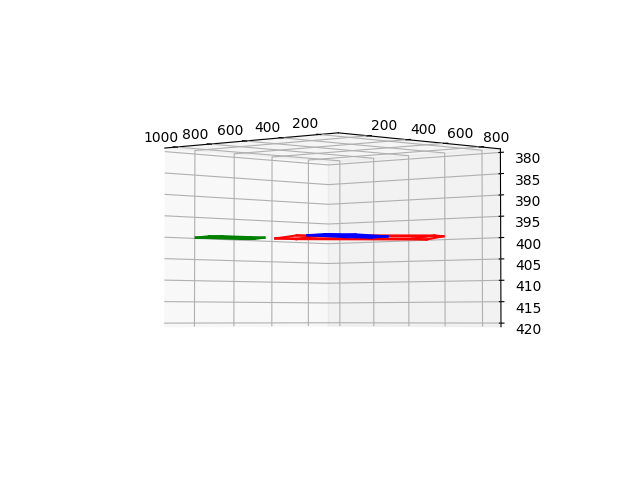

In [46]:
fig = plt.figure()
ax = plt.axes(projection='3d')

for ivica in iviceModem:
    ax.plot3D([rekonstruisane400[ivica[0] - 1][0], rekonstruisane400[ivica[1] - 1][0]], [rekonstruisane400[ivica[0] - 1][1], rekonstruisane400[ivica[1] - 1][1]], [rekonstruisane400[ivica[0] - 1][2], rekonstruisane400[ivica[1] - 1][2]], 'red')

for ivica in iviceCaj:
    ax.plot3D([rekonstruisane400[ivica[0] - 1][0], rekonstruisane400[ivica[1] - 1][0]], [rekonstruisane400[ivica[0] - 1][1], rekonstruisane400[ivica[1] - 1][1]], [rekonstruisane400[ivica[0] - 1][2], rekonstruisane400[ivica[1] - 1][2]], 'blue')

for ivica in iviceKeks:
    ax.plot3D([rekonstruisane400[ivica[0] - 1][0], rekonstruisane400[ivica[1] - 1][0]], [rekonstruisane400[ivica[0] - 1][1], rekonstruisane400[ivica[1] - 1][1]], [rekonstruisane400[ivica[0] - 1][2], rekonstruisane400[ivica[1] - 1][2]], 'green')